<a href="https://colab.research.google.com/github/wanlichen2024/gdda612_project1/blob/main/week3_activities_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [219]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [220]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
# read BL dataset- top 5 rows and end 5 rows
df = pd.read_csv("/content/drive/MyDrive/Data Transformation/BL.csv")

In [222]:
df.head(5)

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [223]:
df.tail(5)

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
8282,4158088,NaN,London,1838,NaN,"The Parochial History of Cornwall, founded on,...","GIDDY, afterwards GILBERT, Davies.","BOASE, Henry Samuel.|HALS, William.|LYSONS, Da...",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8283,4158128,NaN,Derby,"1831, 32",M. Mozley & Son,The History and Gazetteer of the County of Der...,"GLOVER, Stephen - of Derby","NOBLE, Thomas.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8284,4159563,NaN,London,[1806]-22,T. Cadell and W. Davies,Magna Britannia; being a concise topographical...,"LYSONS, Daniel - M.A., F.R.S., and LYSONS (Sam...","GREGSON, Matthew.|LYSONS, Samuel - F.R.S",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 19...
8285,4159587,NaN,Newcastle upon Tyne,1834,Mackenzie & Dent,"An historical, topographical and descriptive v...","Mackenzie, E. (Eneas)","ROSS, M. - of Durham",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 10...
8286,4160339,NaN,London,1834-43,NaN,Collectanea Topographica et Genealogica. [Firs...,NaN,"BANDINEL, Bulkeley.|Nichols, John Gough",NaN,NaN,NaN,NaN,continuing,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS|British Library HMNTS 79...


In [224]:
# check missing value
df.isnull().sum()

Identifier                   0
Edition Statement         7514
Place of Publication         0
Date of Publication        181
Publisher                 4195
Title                        0
Author                    1778
Contributors                 0
Corporate Author          8287
Corporate Contributors    8287
Former owner              8286
Engraver                  8287
Issuance type                0
Flickr URL                   0
Shelfmarks                   0
dtype: int64

In [225]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Identifier              8287 non-null   int64  
 1   Edition Statement       773 non-null    object 
 2   Place of Publication    8287 non-null   object 
 3   Date of Publication     8106 non-null   object 
 4   Publisher               4092 non-null   object 
 5   Title                   8287 non-null   object 
 6   Author                  6509 non-null   object 
 7   Contributors            8287 non-null   object 
 8   Corporate Author        0 non-null      float64
 9   Corporate Contributors  0 non-null      float64
 10  Former owner            1 non-null      object 
 11  Engraver                0 non-null      float64
 12  Issuance type           8287 non-null   object 
 13  Flickr URL              8287 non-null   object 
 14  Shelfmarks              8287 non-null   

In [226]:
#drop useless column
df.drop(columns=['Former owner', 'Corporate Author', 'Corporate Contributors', 'Engraver'], inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Identifier            8287 non-null   int64 
 1   Edition Statement     773 non-null    object
 2   Place of Publication  8287 non-null   object
 3   Date of Publication   8106 non-null   object
 4   Publisher             4092 non-null   object
 5   Title                 8287 non-null   object
 6   Author                6509 non-null   object
 7   Contributors          8287 non-null   object
 8   Issuance type         8287 non-null   object
 9   Flickr URL            8287 non-null   object
 10  Shelfmarks            8287 non-null   object
dtypes: int64(1), object(10)
memory usage: 712.3+ KB


In [227]:
# Clean 'Place of Publication' and 'Title' symbol
df['Place of Publication'] = df['Place of Publication'].str.replace(r'[^\d-]', '')
df['Title'] = df['Title'].str.replace(r'[^\d-]', '')

# From Place of Publication extract 4 digi number as year，fulfil to Date of Publication
df['Date of Publication'] = df.apply(lambda row: row['Place of Publication'] if pd.isna(row['Date of Publication']) else row['Date of Publication'], axis=1)
df['Title'] = df.apply(lambda row: row['Title'] if pd.isna(row['Date of Publication']) else row['Title'], axis=1)

# Clean 'Date of Publication'symbol，only keep year
df['Date of Publication'] = df['Date of Publication'].str.extract(r'(\d{4})')

# convert to date format
df['Date of Publication'] = pd.to_datetime(df['Date of Publication'], format='%Y', errors='coerce')

df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Identifier            8287 non-null   int64         
 1   Edition Statement     773 non-null    object        
 2   Place of Publication  8287 non-null   object        
 3   Date of Publication   8210 non-null   datetime64[ns]
 4   Publisher             4092 non-null   object        
 5   Title                 8287 non-null   object        
 6   Author                6509 non-null   object        
 7   Contributors          8287 non-null   object        
 8   Issuance type         8287 non-null   object        
 9   Flickr URL            8287 non-null   object        
 10  Shelfmarks            8287 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 712.3+ KB


In [228]:
# using mean to fulfil missing value
mean_date = df['Date of Publication'].mean()
df['Date of Publication'].fillna(mean_date, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Identifier            8287 non-null   int64         
 1   Edition Statement     773 non-null    object        
 2   Place of Publication  8287 non-null   object        
 3   Date of Publication   8287 non-null   datetime64[ns]
 4   Publisher             4092 non-null   object        
 5   Title                 8287 non-null   object        
 6   Author                6509 non-null   object        
 7   Contributors          8287 non-null   object        
 8   Issuance type         8287 non-null   object        
 9   Flickr URL            8287 non-null   object        
 10  Shelfmarks            8287 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 712.3+ KB


In [229]:
# Fill missing values with NA to 'Edition Statement'
df['Edition Statement'].fillna('NA', inplace=True)

# Apply regex substitution
df['Edition Statement'] = df['Edition Statement'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Identifier            8287 non-null   int64         
 1   Edition Statement     8287 non-null   object        
 2   Place of Publication  8287 non-null   object        
 3   Date of Publication   8287 non-null   datetime64[ns]
 4   Publisher             4092 non-null   object        
 5   Title                 8287 non-null   object        
 6   Author                6509 non-null   object        
 7   Contributors          8287 non-null   object        
 8   Issuance type         8287 non-null   object        
 9   Flickr URL            8287 non-null   object        
 10  Shelfmarks            8287 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 712.3+ KB


In [230]:
# set date frame
data = {
    'Publisher': df['Publisher'],
    'Title': df['Title'],
    'Author': df['Author']
}

df1 = pd.DataFrame(data)

# check if the title column contains author or publisher information
def contains_info(title, info):
    if pd.isna(title):
        return False
    if info.lower() in title.lower():
        return True
    else:
        return False


contains_author_info = df['Title'].apply(lambda x: contains_info(x, 'author'))
contains_publisher_info = df['Title'].apply(lambda x: contains_info(x, 'publisher'))

print("\nContained author info：")
print(df1[contains_author_info])

print("\Contained publisher info：")
print(df1[contains_publisher_info])



Contained author info：
                   Publisher  \
2      Bradbury, Evans & Co.   
3              James Darling   
6                 The Author   
36          W. Thacker & Co.   
54            Chapman & Hall   
...                      ...   
8245                     NaN   
8257                     NaN   
8258   Richard Bentley & Son   
8280  F. C. and J. Rivington   
8283         M. Mozley & Son   

                                                  Title  \
2     Love the Avenger. By the author of “All for Gr...   
3     Welsh Sketches, chiefly ecclesiastical, to the...   
6     Lagonells. By the author of Darmayne (F. E. A....   
36    A Summer in High Asia: being a record of sport...   
54    Lays of Modern Oxford, by Adon. Illustrated by...   
...                                                 ...   
8245  Zoe's 'Brand.' By the author of “Recommended t...   
8257  A friendly epistle [by Joseph Mitchell?] to th...   
8258  Honor Ormthwaite. By the author of “Lady Jean'...   
8

In [231]:
# fulfil 'Title''s missing vaule by
df['Author'].fillna(df1[contains_author_info]['Title'], inplace=True)
df['Publisher'].fillna(df1[contains_publisher_info]['Title'], inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Identifier            8287 non-null   int64         
 1   Edition Statement     8287 non-null   object        
 2   Place of Publication  8287 non-null   object        
 3   Date of Publication   8287 non-null   datetime64[ns]
 4   Publisher             4096 non-null   object        
 5   Title                 8287 non-null   object        
 6   Author                7002 non-null   object        
 7   Contributors          8287 non-null   object        
 8   Issuance type         8287 non-null   object        
 9   Flickr URL            8287 non-null   object        
 10  Shelfmarks            8287 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 712.3+ KB


In [232]:
df['Publisher'].fillna('NA', inplace=True)
df['Author'].fillna('NA', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Identifier            8287 non-null   int64         
 1   Edition Statement     8287 non-null   object        
 2   Place of Publication  8287 non-null   object        
 3   Date of Publication   8287 non-null   datetime64[ns]
 4   Publisher             8287 non-null   object        
 5   Title                 8287 non-null   object        
 6   Author                8287 non-null   object        
 7   Contributors          8287 non-null   object        
 8   Issuance type         8287 non-null   object        
 9   Flickr URL            8287 non-null   object        
 10  Shelfmarks            8287 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 712.3+ KB


In [233]:
df.isnull().sum()

Identifier              0
Edition Statement       0
Place of Publication    0
Date of Publication     0
Publisher               0
Title                   0
Author                  0
Contributors            0
Issuance type           0
Flickr URL              0
Shelfmarks              0
dtype: int64

In [234]:
format(len(df[df.duplicated()]))

'0'

In [235]:
# Handle Categorical Data:
#before encoding
print("Before encoding:")
print(df['Issuance type'].unique())

Before encoding:
['monographic' 'continuing']


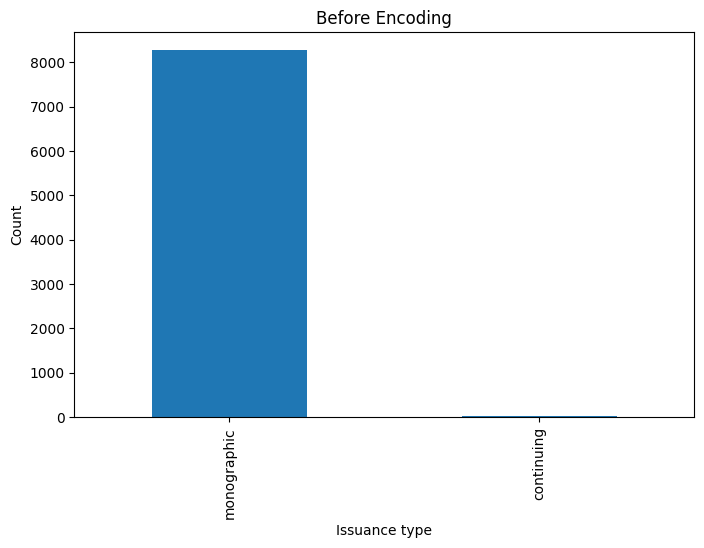

In [236]:
plt.figure(figsize=(8, 5))
plt.title('Before Encoding')
df['Issuance type'].value_counts().plot(kind='bar')
plt.xlabel('Issuance type')
plt.ylabel('Count')
plt.show()


In [237]:
#  LabelEncoder
label_encoder = LabelEncoder()

# Label 'Issuance type'
df['Issuance type'] = label_encoder.fit_transform(df['Issuance type'])

In [238]:
print("After encoding:")
print(df['Issuance type'].unique())

After encoding:
[1 0]


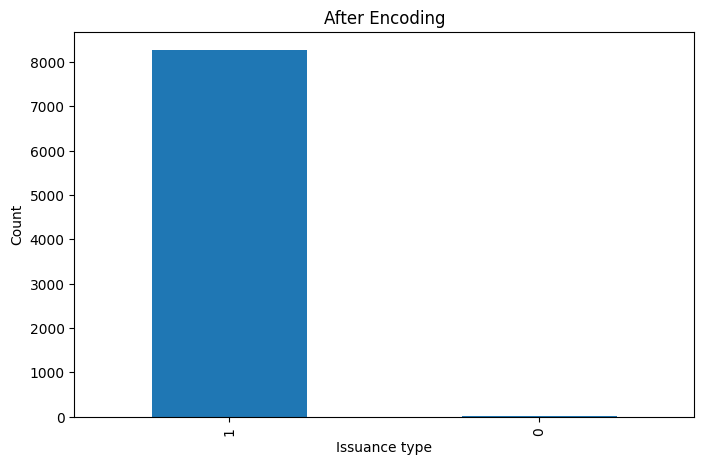

In [239]:
plt.figure(figsize=(8, 5))
plt.title('After Encoding')
df['Issuance type'].value_counts().plot(kind='bar')
plt.xlabel('Issuance type')
plt.ylabel('Count')
plt.show()

In [240]:
# save as csv
df.to_csv("/content/drive/MyDrive/Data Transformation/cleaned_BL.csv", index=False)